In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


numeric olmayan verileri encode etmemiz gerek

In [9]:
df.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64

Boş veri yok

In [22]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [27]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

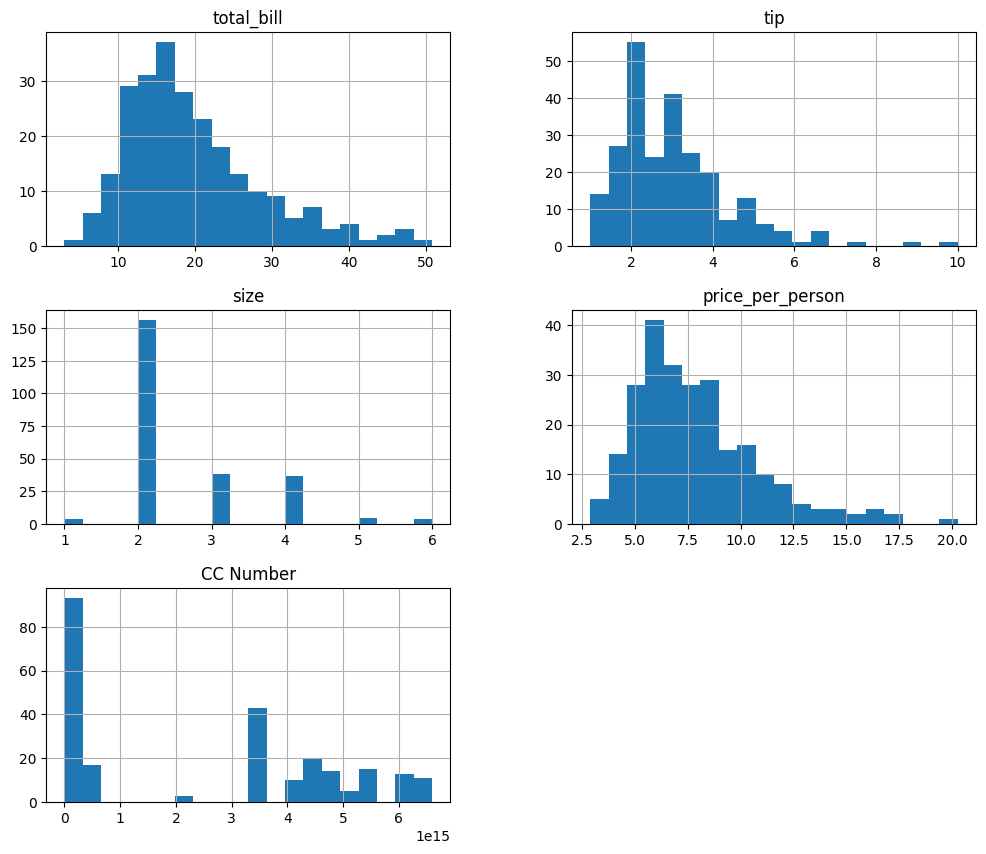

In [29]:
#sayısal kolonların dağılımlarının grafikleri
df.hist(bins=20, figsize=(12, 10))
plt.show()

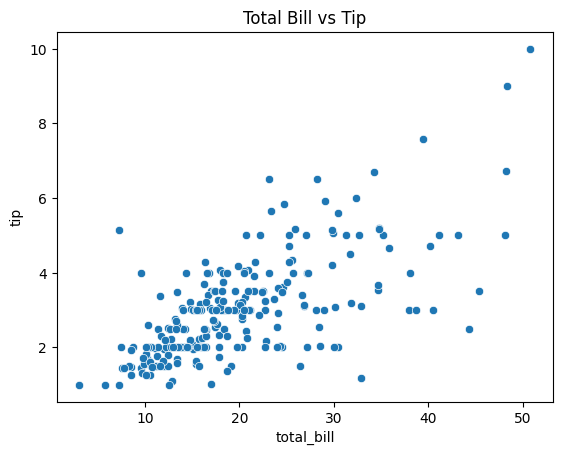

In [31]:
# toplam hesap ve bahşiş arasındaki ilişki
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Total Bill vs Tip')
plt.show()

In [38]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [40]:
# bazı kolonların tahmine etkisi açısından gereksiz olduğunu düşündüğüm için çıkarıyorum
df_cleaned = df.drop(['Payer Name', 'CC Number', 'Payment ID'], axis=1)
df_cleaned.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [45]:
# numeric olmayan verileri numeric hale getiriyoruz
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

X = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']
X.shape, y.shape

((244, 9), (244,))

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
# test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
# Performansı değerlendirme
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree MSE: 1.3846675675675677
Decision Tree R2 Score: -0.05043159124925678


## Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Performans değerlendirme
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 0.9258472002702712
Random Forest R2 Score: 0.2976370858876831


## Decision Tree - Gerçek vs Tahmin Grafiği

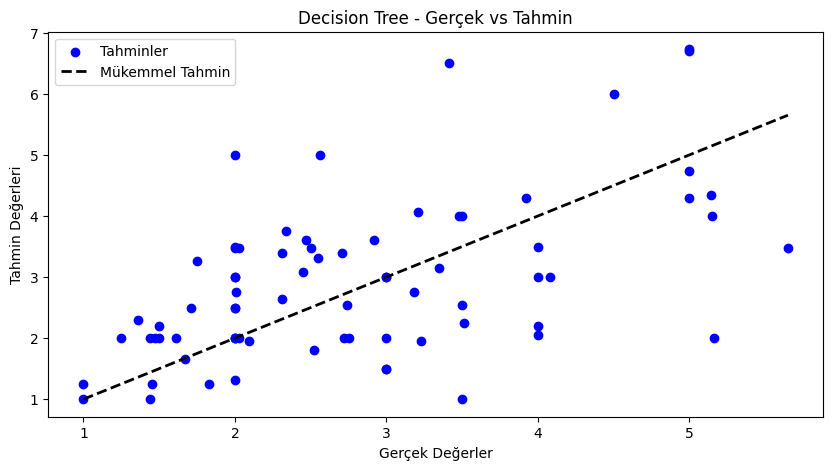

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_dt, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Mükemmel Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Decision Tree - Gerçek vs Tahmin')
plt.legend()
plt.show()

## Random Forest - Gerçek vs Tahmin Grafiği

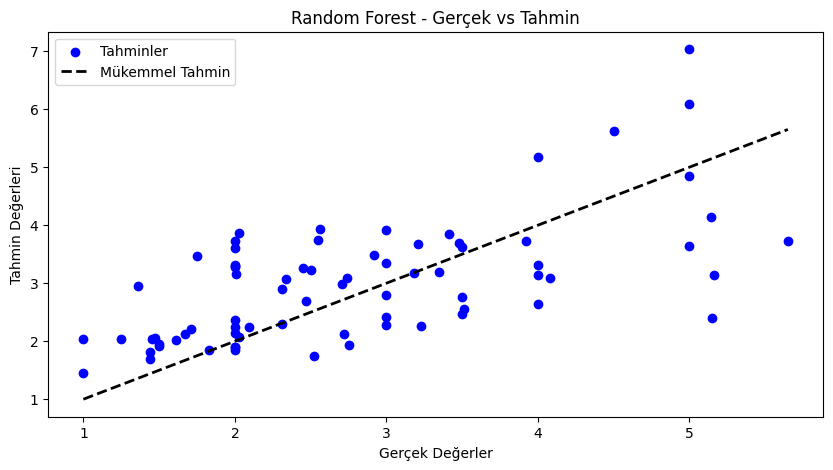

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Mükemmel Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Random Forest - Gerçek vs Tahmin')
plt.legend()
plt.show()